# #Machine Learning Engineer Nanodegree
#Final capstone project#
***This project predicts the stock market price of S&P 500 company AMD using data from YAHOO Finance***

# Dataset

step 1:Getting data of S&P 500 company

In [1]:
import pandas as pd
import datetime
import pandas_datareader as web
from pandas_datareader import data
def get(symbol,start_date,end_date):
    
    symbol = symbol.upper()
    start = datetime.date(int(start_date[0:3]), int(start_date[4:7]), int(start_date[8:10]))
    end = datetime.date(int(end_date[0:3]), int(end_date[5:7]), int(end_date[8:10]))
   
    col = ['Date','Open','High','Low','Close','Adj Close','Volume']
     
    
    daa = pd.DataFrame(stocks)
    return daa

step 2:get data from Yahoo finance

In [2]:
start = datetime.datetime(2009,5,22)
end = datetime.datetime(2018,8,29)

In [3]:
#dynamic dataset
tickers = ['AMD']

d = web.DataReader("A",'yahoo',start,end)
d.to_csv('A.csv')


# Preprocess the data

In [4]:
datl= pd.read_csv(r'A.csv')
print (datl.head())
print ('\n Data Types:')
print (datl.dtypes)

         Date       High        Low       Open      Close     Volume  \
0  2009-05-21  13.154507  12.510730  13.032905  12.646638  4439900.0   
1  2009-05-22  12.804006  12.482118  12.703862  12.653791  3602900.0   
2  2009-05-26  12.939914  12.446352  12.632332  12.911302  3461500.0   
3  2009-05-27  13.090129  12.753934  12.939914  12.796853  3757800.0   
4  2009-05-28  13.018598  12.517882  12.947067  12.861230  3126600.0   

   Adj Close  
0  11.648037  
1  11.654627  
2  11.891805  
3  11.786391  
4  11.845683  

 Data Types:
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object


In [5]:
import pandas as pd
import numpy as np


print(d.head())

print("\n")
print("Open   --- mean :", np.mean(d['Open']),  "  \t Std: ", np.std(d['Open']),  "  \t Max: ", np.max(d['Open']),  "  \t Min: ", np.min(d['Open']))
print("High   --- mean :", np.mean(d['High']),  "  \t Std: ", np.std(d['High']),  "  \t Max: ", np.max(d['High']),  "  \t Min: ", np.min(d['High']))
print("Low    --- mean :", np.mean(d['Low']),   "  \t Std: ", np.std(d['Low']),   "  \t Max: ", np.max(d['Low']),   "  \t Min: ", np.min(d['Low']))
print("Close  --- mean :", np.mean(d['Close']), "  \t Std: ", np.std(d['Close']), "  \t Max: ", np.max(d['Close']), "  \t Min: ", np.min(d['Close']))
print("Volume --- mean :", np.mean(d['Volume']),"  \t Std: ", np.std(d['Volume']),"  \t Max: ", np.max(d['Volume']),"  \t Min: ", np.min(d['Volume']))


                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2009-05-21  13.154507  12.510730  13.032905  12.646638  4439900.0  11.648037
2009-05-22  12.804006  12.482118  12.703862  12.653791  3602900.0  11.654627
2009-05-26  12.939914  12.446352  12.632332  12.911302  3461500.0  11.891805
2009-05-27  13.090129  12.753934  12.939914  12.796853  3757800.0  11.786391
2009-05-28  13.018598  12.517882  12.947067  12.861230  3126600.0  11.845683


Open   --- mean : 38.044057928944284   	 Std:  13.98288589693391   	 Max:  74.94000244140625   	 Min:  12.632331848144531
High   --- mean : 38.411420056672945   	 Std:  14.045250046984183   	 Max:  75.0   	 Min:  12.80400562286377
Low    --- mean : 37.676027463315286   	 Std:  13.911554950476647   	 Max:  74.30000305175781   	 Min:  12.446352005004883
Close  --- mean : 38.05656625514161   	 Std:  13.967007410485394   	 Max:  74.81999969482422   	 Min:  12

In [6]:
print (d.head(10))
print (d.tail(10))

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2009-05-21  13.154507  12.510730  13.032905  12.646638  4439900.0  11.648037
2009-05-22  12.804006  12.482118  12.703862  12.653791  3602900.0  11.654627
2009-05-26  12.939914  12.446352  12.632332  12.911302  3461500.0  11.891805
2009-05-27  13.090129  12.753934  12.939914  12.796853  3757800.0  11.786391
2009-05-28  13.018598  12.517882  12.947067  12.861230  3126600.0  11.845683
2009-05-29  13.040057  12.711016  12.911302  13.040057  2769200.0  12.010394
2009-06-01  13.741058  13.190271  13.190271  13.505007  5764500.0  12.438632
2009-06-02  14.163090  13.469242  13.497854  13.984263  5233600.0  12.880044
2009-06-03  14.020029  13.705294  13.941345  13.826896  5618100.0  12.735099
2009-06-04  14.463519  13.869814  13.869814  14.334764  4408100.0  13.202869
                 High        Low       Open      Close     Volume  Adj Close

In [7]:
d.groupby(['Low','High','Open','Close','Adj Close','Volume']).max()

,,,,,
Low,High,Open,Close,Adj Close,Volume
12.446352,12.939914,12.632332,12.911302,11.891805,3461500.0
12.482118,12.804006,12.703862,12.653791,11.654627,3602900.0
12.510730,13.154507,13.032905,12.646638,11.648037,4439900.0
12.517882,13.018598,12.947067,12.861230,11.845683,3126600.0
12.711016,13.040057,12.911302,13.040057,12.010394,2769200.0
12.753934,13.090129,12.939914,12.796853,11.786391,3757800.0
12.997139,13.519313,13.118741,13.390558,12.333218,3287800.0
13.104435,13.404864,13.340487,13.147353,12.109218,4365300.0
13.118741,13.490701,13.419170,13.161659,12.122393,4045900.0


In [8]:
import random
ts=d['Adj Close']
t=random.choice(ts)

In [9]:
t

26.27754020690918

In [10]:
d.shape

(2336, 6)

# Relational analysis

In [11]:
import matplotlib.pyplot as plt

In [12]:
X=d.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

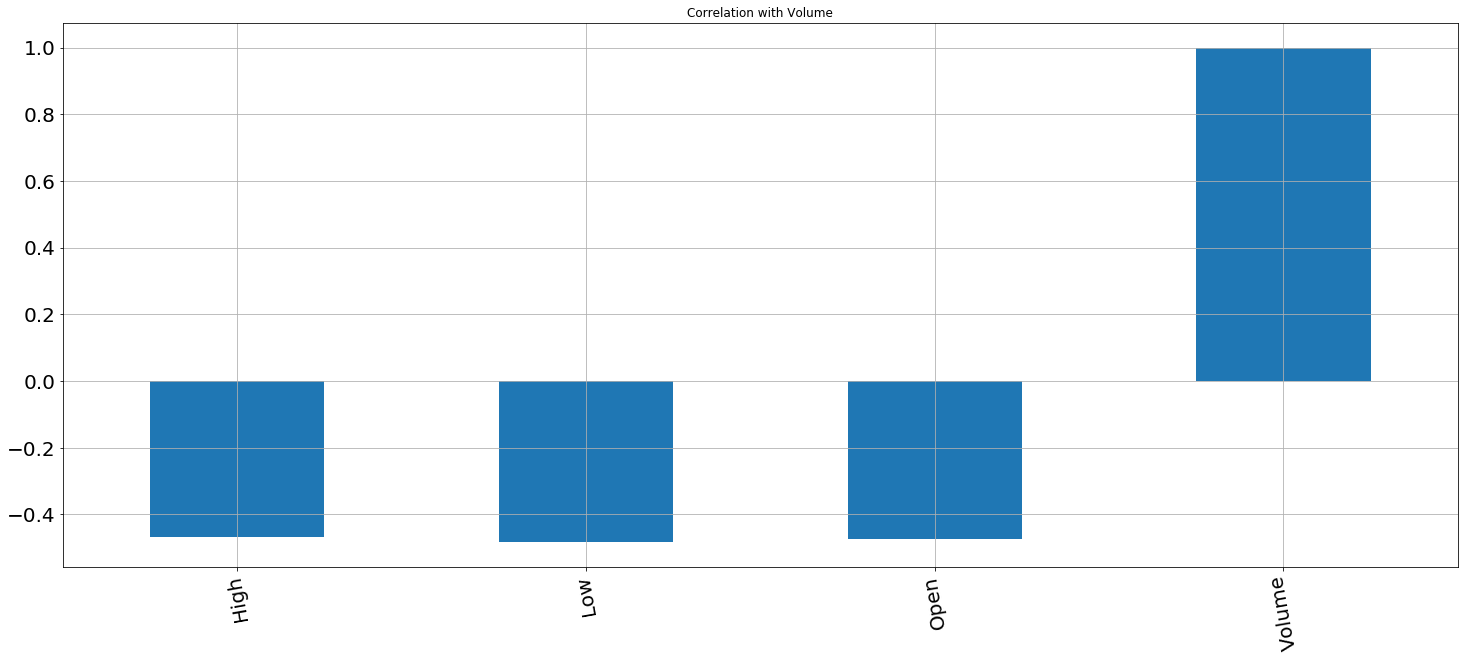

In [13]:
X.corrwith(d['Volume']).plot.bar(
        figsize = (25, 10), title = "Correlation with Volume", fontsize = 20,
        rot = 100, grid = True)

In [14]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
dr=d.drop(["Open","Close"],axis=1)
print(dr.head())
print('-----------------------------------------------------------------------------------')
print(dr.tail())


                 High        Low     Volume  Adj Close
Date                                                  
2009-05-21  13.154507  12.510730  4439900.0  11.648037
2009-05-22  12.804006  12.482118  3602900.0  11.654627
2009-05-26  12.939914  12.446352  3461500.0  11.891805
2009-05-27  13.090129  12.753934  3757800.0  11.786391
2009-05-28  13.018598  12.517882  3126600.0  11.845683
-----------------------------------------------------------------------------------
                 High        Low     Volume  Adj Close
Date                                                  
2018-08-23  65.989998  65.529999  2287700.0  65.256126
2018-08-24  66.260002  65.589996  1904200.0  65.544205
2018-08-27  66.349998  65.860001  1158800.0  65.643539
2018-08-28  67.300003  66.349998  2284300.0  66.249519
2018-08-29  67.279999  66.400002  1852100.0  66.567413


In [15]:
test = d
# Target column
target_adj_close = pd.DataFrame(test['Volume'])
display(test.head())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-05-21,13.154507,12.510730,13.032905,12.646638,4439900.0,11.648037
2009-05-22,12.804006,12.482118,12.703862,12.653791,3602900.0,11.654627
2009-05-26,12.939914,12.446352,12.632332,12.911302,3461500.0,11.891805
2009-05-27,13.090129,12.753934,12.939914,12.796853,3757800.0,11.786391
2009-05-28,13.018598,12.517882,12.947067,12.861230,3126600.0,11.845683


In [16]:
dataset = pd.read_csv('A.csv',index_col="Date",parse_dates=True)


In [17]:
dataset_train = pd.read_csv('A.csv')
training_set = dataset_train.iloc[:, 1:2].values

# MinMaxScaler


In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [20]:
X_train = []
y_train = []
for i in range(60, 2036):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
import tensorflow as tf
x = tf.constant([2.2, 2.3], dtype=tf.float64)
tf.cast(x, tf.int32)

<tf.Tensor 'Cast:0' shape=(2,) dtype=int32>

In [23]:
import pandas as pd
m = pd.read_csv(r'A.csv', parse_dates=['Date'], na_values=['990.99'],index_col = ['Date'])
cal = m[start :end]
cal.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-05-22,12.804006,12.482118,12.703862,12.653791,3602900.0,11.654627
2009-05-26,12.939914,12.446352,12.632332,12.911302,3461500.0,11.891805
2009-05-27,13.090129,12.753934,12.939914,12.796853,3757800.0,11.786391
2009-05-28,13.018598,12.517882,12.947067,12.861230,3126600.0,11.845683
2009-05-29,13.040057,12.711016,12.911302,13.040057,2769200.0,12.010394


In [25]:
d.shape

(2336, 6)

In [26]:
dataset_test = pd.read_csv('pred.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

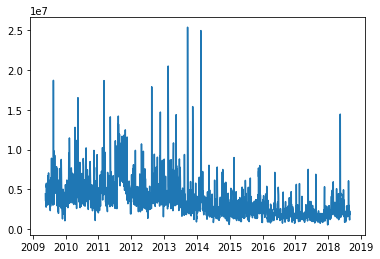

In [27]:
import matplotlib.pyplot as plt
o=plt.plot(d['Volume'])
plt.show(o)

In [28]:

# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Adj Close','Volume']

In [29]:
#feature reduction
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2009-05-21,0.006429,0.005635,0.001041,0.000000,0.157321
2009-05-22,0.001148,0.000000,0.000578,0.000106,0.123619
2009-05-26,0.000000,0.002185,0.000000,0.003911,0.117926
2009-05-27,0.004937,0.004600,0.004973,0.002220,0.129856
2009-05-28,0.005051,0.003450,0.001156,0.003171,0.104442


In [30]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())


,Open,High,Low,Adj Close,Volume
Date,,,,,
2009-05-21,0.006429,0.005635,0.001041,0.000000,0.157321
2009-05-22,0.001148,0.000000,0.000578,0.000106,0.123619
2009-05-26,0.000000,0.002185,0.000000,0.003911,0.117926
2009-05-27,0.004937,0.004600,0.004973,0.002220,0.129856
2009-05-28,0.005051,0.003450,0.001156,0.003171,0.104442


Shape of features :  (2336, 5)
Shape of target :  (2336, 1)


,Open,High,Low,Adj Close,Volume
Date,,,,,
2018-08-22,0.836296,0.853206,0.842370,0.859382,0.081853
2018-08-23,0.851543,0.855135,0.858214,0.860020,0.070664
2018-08-24,0.852346,0.859477,0.859184,0.864641,0.055222
2018-08-27,0.861815,0.860923,0.863549,0.866235,0.025209
2018-08-28,0.863099,0.876198,0.871471,0.875956,0.070527


,Volume
Date,
2018-08-22,2287700.0
2018-08-23,1904200.0
2018-08-24,1158800.0
2018-08-27,2284300.0
2018-08-28,1852100.0



 -----After process------ 

Shape of features :  (2246, 5)
Shape of target :  (2246, 1)


,Volume
Date,
2018-04-17,2678300.0
2018-04-18,2435100.0
2018-04-19,1917200.0
2018-04-20,2260600.0
2018-04-23,3701600.0


In [31]:
dataset_test = pd.read_csv('A.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

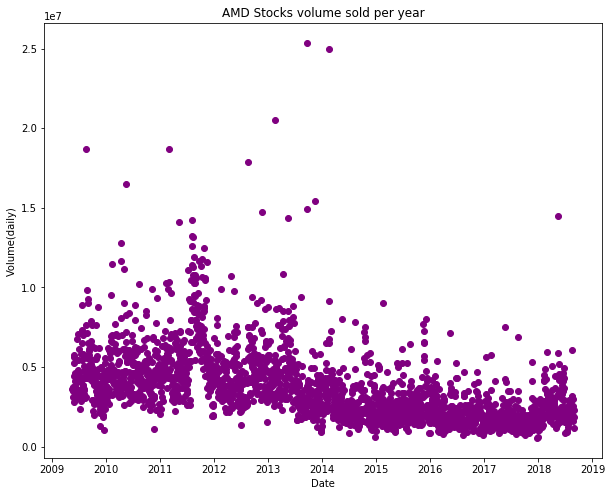

In [32]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(cal.index.values, 
       cal['Volume'].values,
       color='purple')
ax.set(xlabel="Date", ylabel="Volume(daily)")
ax.set(title="AMD Stocks volume sold per year");

# Analysis using Time series

In [39]:

ts_split= TimeSeriesSplit(n_splits=12)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [40]:
X_train.shape

(2074, 5)

In [41]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

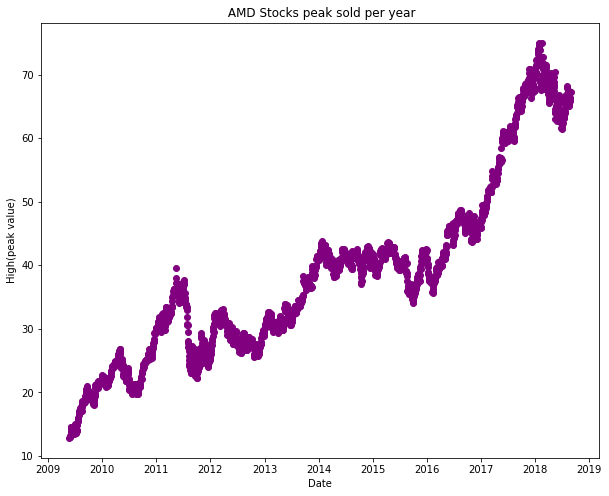

In [42]:
#analysis of high prices using graph
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(cal.index.values, 
       cal['High'].values,
       color='purple')
ax.set(xlabel="Date", ylabel="High(peak value)")
ax.set(title=" AMD Stocks peak sold per year");

In [43]:
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
x=d['Adj Close'].head(10)
y=d['High'].head(10)
z=d['Low'].head(10)

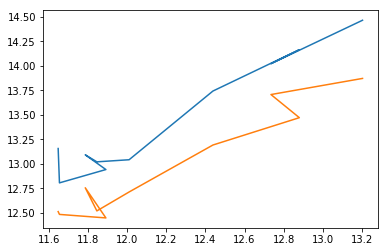

In [44]:
plt.plot(x,y)
plt.plot(x,z)

# Current Analysis

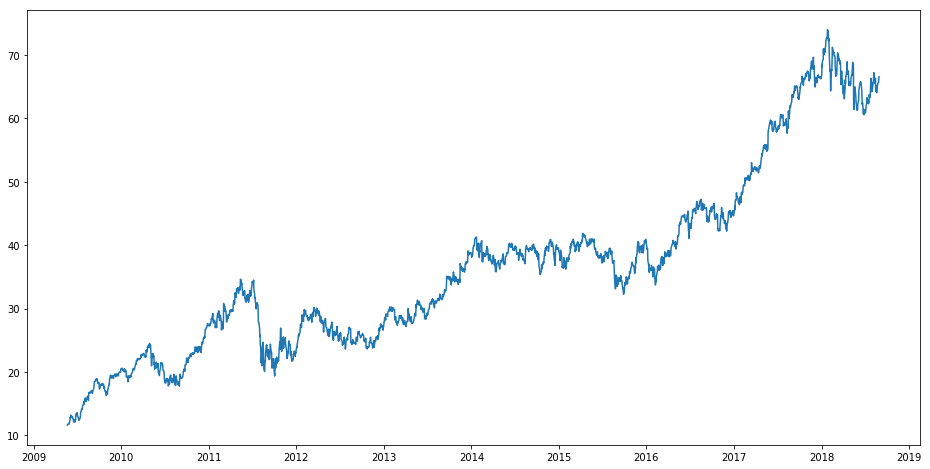

In [33]:

m = pd.read_csv(r'A.csv', parse_dates=['Date'], na_values=['990.99'],index_col = ['Date'])
cal = m[start :end]
cal.head()

#plot
plt.figure(figsize=(16,8))
plt.plot(d['Adj Close'], label='Close Price history')

# LSTM analysis

In [34]:
# Importing the Keras libraries and packages

from keras import *
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [35]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 50, batch_size = 16)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1976/1976 [==============================] - 35s 18ms/step - loss: 0.0101
Epoch 2/50
1976/1976 [==============================] - 26s 13ms/step - loss: 0.0020
Epoch 3/50
1976/1976 [==============================] - 26s 13ms/step - loss: 0.0018
Epoch 4/50
1976/1976 [==============================] - 23s 12ms/step - loss: 0.0020
Epoch 5/50
1976/1976 [==============================] - 25s 12ms/step - loss: 0.0016
Epoch 6/50
1976/1976 [==============================] - 24s 12ms/step - loss: 0.0015
Epoch 7/50
1976/1976 [==============================] - 25s 12ms/step - loss: 0.0013
Epoch 8/50
1976/1976 [==============================] - 25s 13ms/step - loss: 0.0012
Epoch 9/50
1976/1976 [==============================] - 24s 12ms/step - loss: 0.0013


In [45]:
dataset_test = pd.read_csv('A.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [46]:
#creating test and training dataset
dataset_total = pd.concat((dataset_train['High'], dataset_test['High']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [47]:
#Metrics
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

In [48]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(X_train, y_train)
lin.score(X_train, y_train)


0.44301530984920895

In [49]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

# Linear Regression Bench Mark

RMSE:  2090341.728768625
R2 score:  -0.5781440505387052


NameError: name 'mdates' is not defined

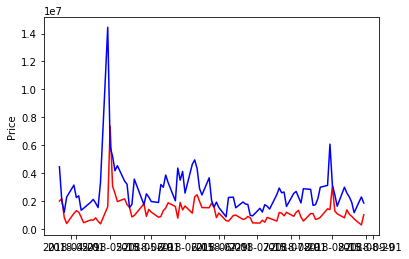

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

dt = LinearRegression()

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Linear Regression')

RMSE:  2161838.0291997786
R2 score:  -0.6879452912184947


NameError: name 'mdates' is not defined

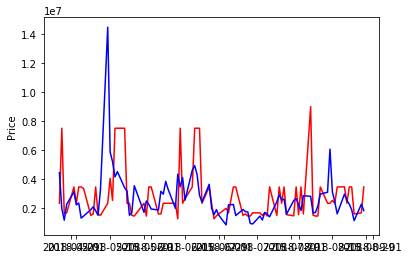

In [51]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

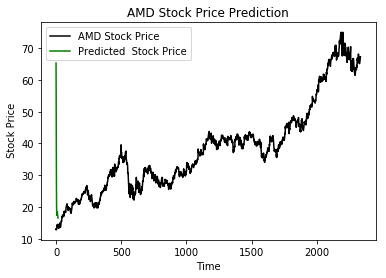

In [52]:
#LSTM visualization 1
import matplotlib.pyplot as plt

plt.plot(real_stock_price, color = 'black', label = 'AMD Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted  Stock Price')
plt.title('AMD Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [53]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# LSTM predictions

In [54]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=20, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/20
2074/2074 [==============================] - 3s 1ms/step - loss: 20138118260576.0312
Epoch 2/20
2074/2074 [==============================] - 1s 385us/step - loss: 20138083926537.3789
Epoch 3/20
2074/2074 [==============================] - 1s 367us/step - loss: 20137994738929.9258
Epoch 4/20
2074/2074 [==============================] - 1s 379us/step - loss: 20137873331625.5938
Epoch 5/20
2074/2074 [==============================] - 1s 375us/step - loss: 20137732747109.9531
Epoch 6/20
2074/2074 [==============================] - 1s 367us/step - loss: 20137571737607.8984
Epoch 7/20
2074/2074 [==============================] - 1s 377us/step - loss: 20137390874932.0898
Epoch 8/20
2074/2074 [==============================] - 1s 369us/step - loss: 20137191785538.1602
Epoch 9/20
2074/2074 [==============================] - 1s 370us/step - loss: 20136974465381.4609
Epoch 10/20
2074/2074 [==============================] - 1s 372us/step - loss: 20136739588907.6953
Epoch 11/20
2074/2074

In [56]:


y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

ValueError: Error when checking input: expected lstm_1_input to have shape (1, 5) but got array with shape (1, 60)

In [65]:
lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

ValueError: Error when checking input: expected lstm_1_input to have shape (1, 5) but got array with shape (1, 60)

In [51]:
print('LSTM: %f'%lstm)

LSTM: 3.153766


In [53]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

In [54]:
#1. Specify the entire range:
ts['2011-05-11':'2017-05-11']

#2. Use ':' if one of the indices is at ends:
ts[:'2017-05-11']

Date
2009-05-21    4439900.0
2009-05-22    3602900.0
2009-05-26    3461500.0
2009-05-27    3757800.0
2009-05-28    3126600.0
2009-05-29    2769200.0
2009-06-01    5764500.0
2009-06-02    5233600.0
2009-06-03    5618100.0
2009-06-04    4408100.0
2009-06-05    3230300.0
2009-06-08    3000500.0
2009-06-09    4124100.0
2009-06-10    3781700.0
2009-06-11    4628600.0
2009-06-12    3673500.0
2009-06-15    3293400.0
2009-06-16    4170600.0
2009-06-17    4365300.0
2009-06-18    3287800.0
2009-06-19    6732600.0
2009-06-22    4045900.0
2009-06-23    3580100.0
2009-06-24    5450800.0
2009-06-25    7063600.0
2009-06-26    4788500.0
2009-06-29    3079700.0
2009-06-30    5433000.0
2009-07-01    4742700.0
2009-07-02    6138800.0
                ...    
2017-03-30    1627400.0
2017-03-31    1705600.0
2017-04-03    1550200.0
2017-04-04    2017100.0
2017-04-05    1778300.0
2017-04-06    1548200.0
2017-04-07    1243600.0
2017-04-10    1025200.0
2017-04-11    1520700.0
2017-04-12    1258200.0
2017-04-13 

# Actual V/S Predicted

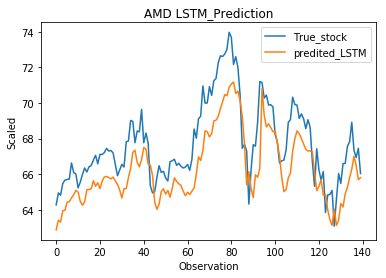

In [56]:
plt.plot(y_test, label='True_stock')
plt.plot(y_pred_test_LSTM, label='predited_LSTM')
plt.title("AMD LSTM_Prediction")
plt.xlabel('Observation')
plt.ylabel('Scaled')
plt.legend()
plt.show()